Import necessary libraries

In [37]:
import cv2
import numpy as np
from PIL import Image


Load image

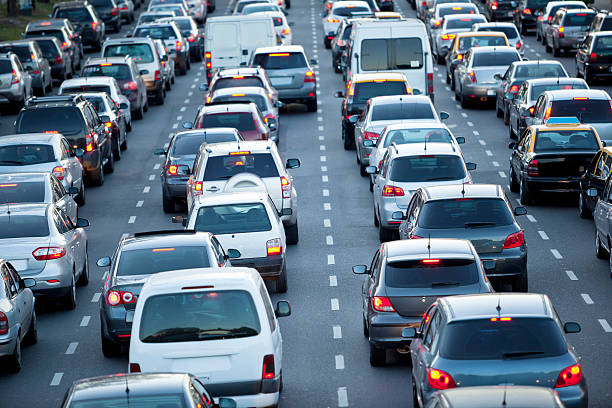

In [38]:
image = Image.open('istockphoto-155287967-612x612.jpg')
image

Resize the image

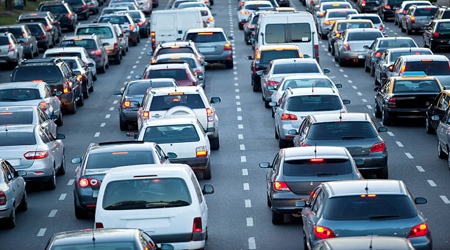

In [39]:
image = image.resize((450,250))
image

Convert image to array

In [40]:
image_arr = np.array(image)


Convert image to gray scale

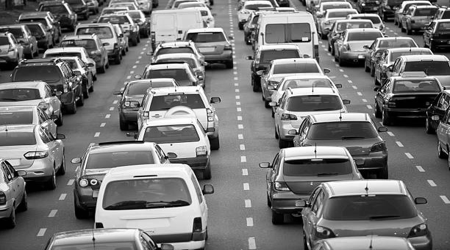

In [41]:
grey = cv2.cvtColor(image_arr,cv2.COLOR_BGR2GRAY)
grey
Image.fromarray(grey)

Apply blur effect to reduce noice

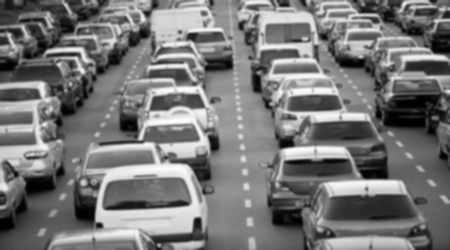

In [42]:
blur = cv2.GaussianBlur(grey,(5,5),0)
Image.fromarray(blur)

Applay dilated to fill missing parts

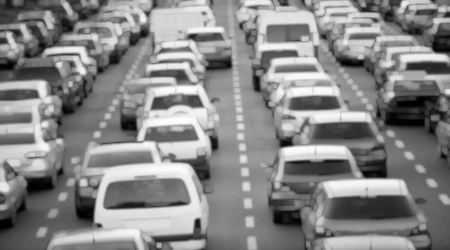

In [43]:
dilated = cv2.dilate(blur,np.ones((3,3)))
Image.fromarray(dilated)

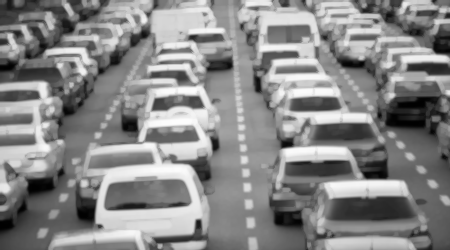

In [44]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel) 
Image.fromarray(closing)

In [31]:
car_cascade_src = 'cars.xml'
car_cascade = cv2.CascadeClassifier(car_cascade_src)
cars = car_cascade.detectMultiScale(closing, 1.1, 1)
cars

array([[175,  37,  22,  22],
       [412, 190,  21,  21],
       [277, 105,  23,  23],
       [260, 188,  54,  54],
       [420, 119,  23,  23],
       [308,  66,  30,  30],
       [117, 130,  50,  50],
       [352, 146,  48,  48],
       [290,  48,  35,  35],
       [310, 129,  55,  55],
       [391,  37,  49,  49],
       [ 97, 171,  57,  57],
       [  1,  92,  43,  43],
       [344,  12,  39,  39],
       [311, 155,  87,  87],
       [  1, 116,  43,  43],
       [347, 126,  59,  59],
       [189,  27,  59,  59],
       [134,  86,  78,  78],
       [254,   0,  63,  63]])

Count how many cars are presented with in a particular limit

20  cars found


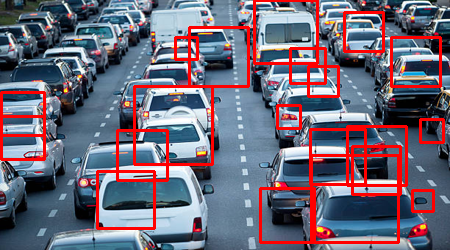

In [33]:
cnt = 0
for (x,y,w,h) in cars:
    cv2.rectangle(image_arr,(x,y),(x+w,y+h),(255,0,0),2)
    cnt=cnt+1
print(cnt, " cars found")
Image.fromarray(image_arr)